<a href="https://colab.research.google.com/github/hashPhoeNiX/ColabNotebooks/blob/master/Adeosun_Oluwapelumi_DSN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/gdrive/My Drive/Colab Notebooks/DSN Pre-Bootcamp/')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

%matplotlib inline 
sns.set(style="darkgrid")

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


## EDA

In [ ]:
data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [ ]:
# Dataset size
data.shape

(38312, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [ ]:
# Statistical Description of the data
data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


In [ ]:
# pandas profile report of the data
pp.ProfileReport(data)

Number of variables,19
Number of observations,38312
Total Missing (%),0.2%
Total size in memory,5.6 MiB
Average record size in memory,152.0 B
Numeric,5
Categorical,10
Boolean,3
Date,0
Text (Unique),1
Rejected,0


In [ ]:
# Categorical variables

categorical = data.select_dtypes(include="object")
categorical.count()

EmployeeNo                             38312
Division                               38312
Qualification                          36633
Gender                                 38312
Channel_of_Recruitment                 38312
State_Of_Origin                        38312
Foreign_schooled                       38312
Marital_Status                         38312
Past_Disciplinary_Action               38312
Previous_IntraDepartmental_Movement    38312
No_of_previous_employers               38312
dtype: int64

In [ ]:
# Numerical variables

numerical = data.select_dtypes(include=np.number)
numerical.count()

Trainings_Attended        38312
Year_of_birth             38312
Last_performance_score    38312
Year_of_recruitment       38312
Targets_met               38312
Previous_Award            38312
Training_score_average    38312
Promoted_or_Not           38312
dtype: int64

In [ ]:
# A sum of missing values in each columns
data.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e7e17d7b8>,
      dtype=object)

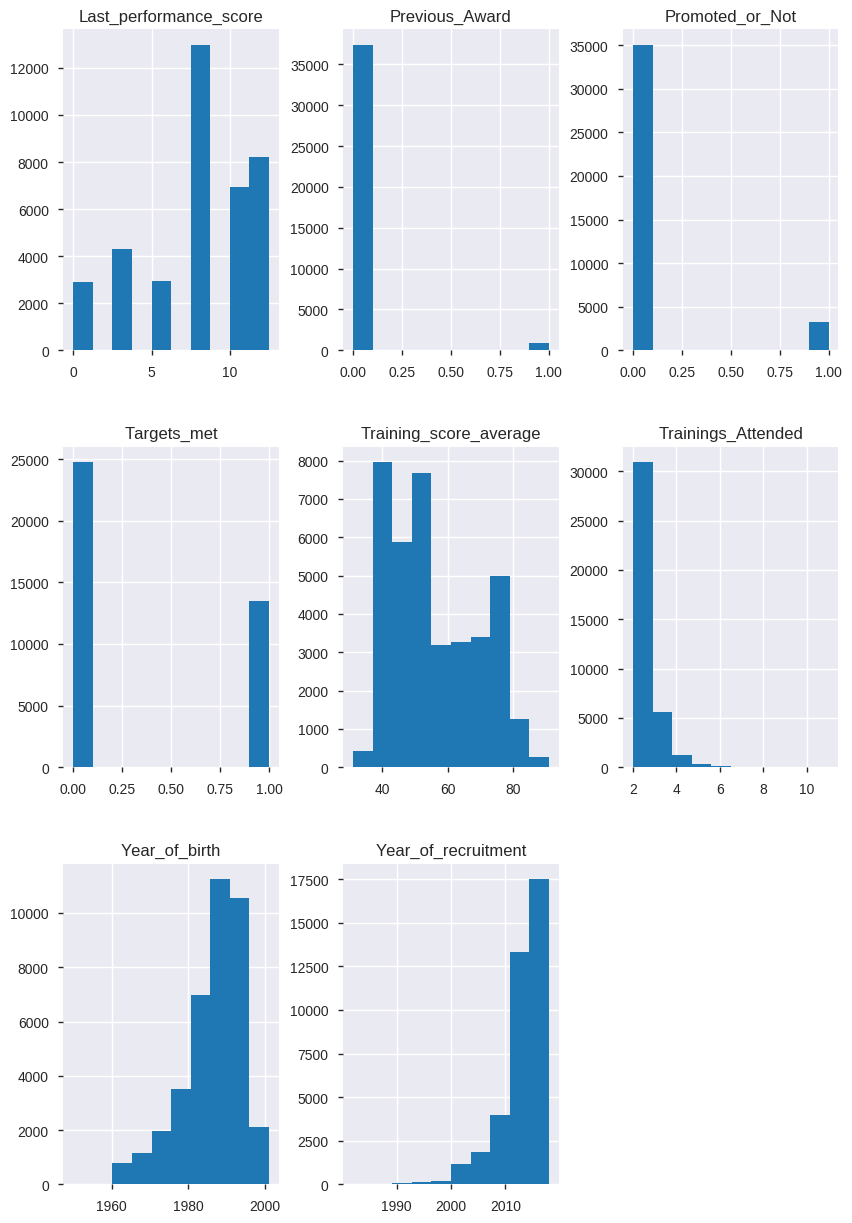

In [ ]:
# histogram for numerical columns
numerical.hist(figsize=(10, 15))

In [ ]:
categorical.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers'],
      dtype='object')

<Figure size 1000x1500 with 0 Axes>

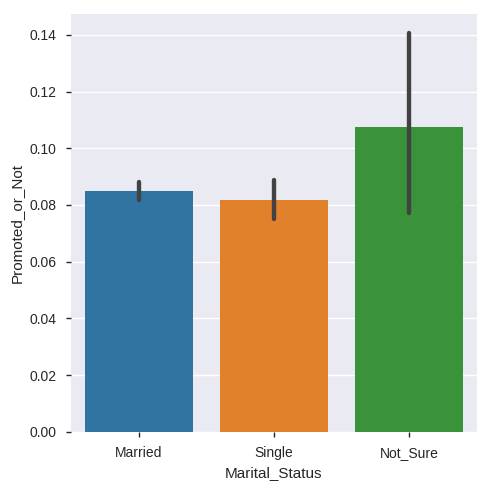

In [ ]:
plt.figure(figsize=(10, 15))
sns.catplot(x = 'Marital_Status', y = 'Promoted_or_Not', kind='bar', data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

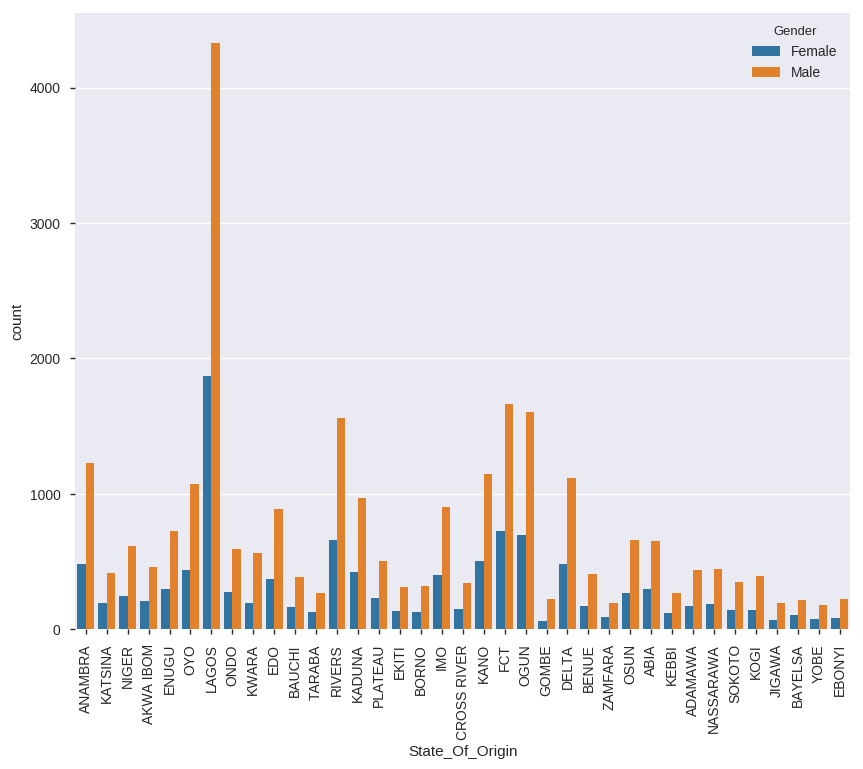

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='State_Of_Origin', hue='Gender', data=data)
plt.xticks(rotation=90)

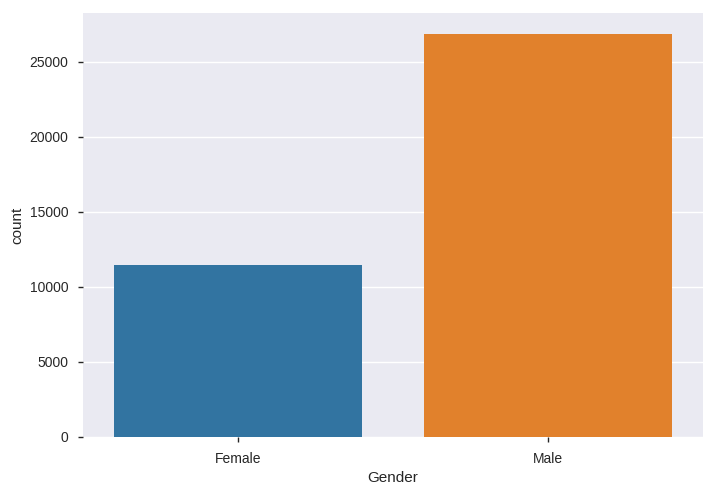

In [ ]:
sns.countplot(data['Gender'])

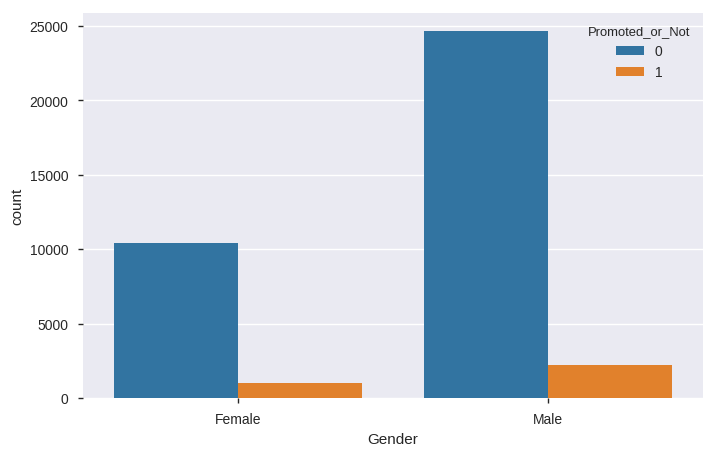

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Promoted_or_Not', data=data)

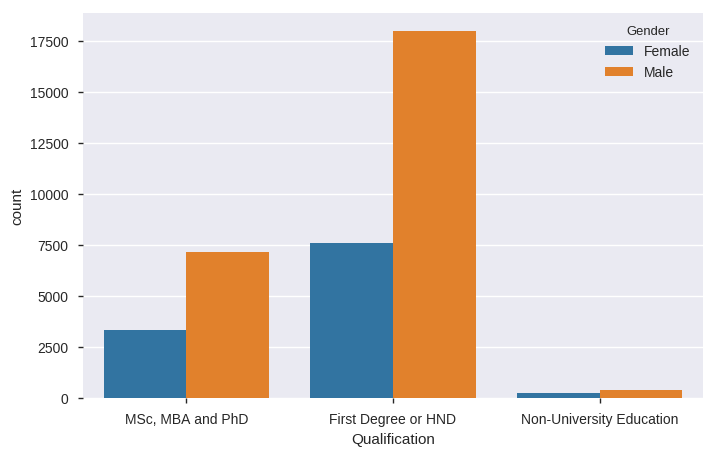

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Qualification', hue='Gender', data=data)

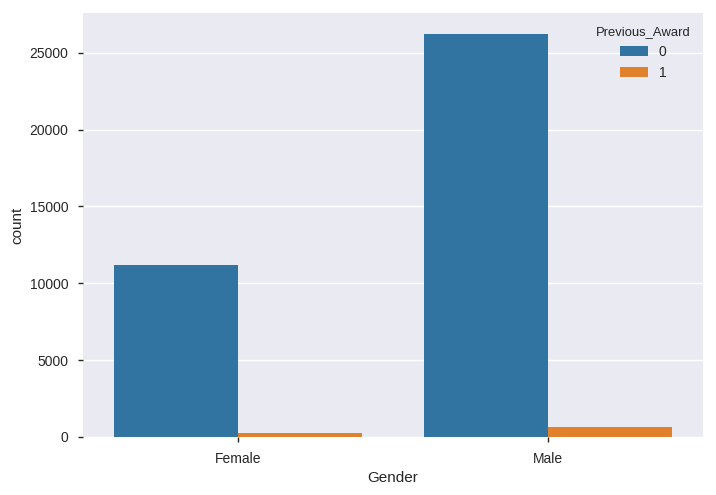

In [ ]:
sns.countplot(x='Gender', hue='Previous_Award', data=data)

## Cleaning and Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
def clean_dataset(df):
  df['No_of_previous_employers'] = df['No_of_previous_employers'].replace('More than 5', 6).astype(int)
  df = df.drop('EmployeeNo', axis=1)
  df['Qualification'] = df['Qualification'].fillna(df['Qualification'].mode()[0]) # filling with the modal value
  
  return df

In [ ]:
def encoder(df, le=LabelEncoder()):
    """ Returns an encoded dataframe """
    columns = df.select_dtypes(include='object').columns.tolist()
    # label encoding the categorical variables
    df[columns] = df[columns].apply(lambda x: le.fit_transform(x))
    
    # getting dummy variables from the catogorical variables and dropping the first variable to avoid dummy variable trap
    df = pd.get_dummies(df, columns=columns, drop_first=True) 
    
    return df

In [ ]:
train = clean_dataset(data)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 18 columns):
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         38312 non-null object
Past_Disciplinary_Action               383

In [ ]:
train.head(2)

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0


In [ ]:
def feature_engineer(df):
  """ 
  Age - Current age of the employee
  Year_at_work - Years spent at work since Recruitment

  Returns: a new dataframe with the engineered features 

  """

  df['Age'] = 2019 - df['Year_of_birth']
  df['Years_at_work'] = 2019 - df['Year_of_recruitment']

  df = df.drop(['Year_of_birth', 'Year_of_recruitment'], axis=1)

  return df

In [ ]:
train = feature_engineer(train)

In [ ]:
train['State_Of_Origin'].unique()

array(['ANAMBRA', 'KATSINA', 'NIGER', 'AKWA IBOM', 'ENUGU', 'OYO',
       'LAGOS', 'ONDO', 'KWARA', 'EDO', 'BAUCHI', 'TARABA', 'RIVERS',
       'KADUNA', 'PLATEAU', 'EKITI', 'BORNO', 'IMO', 'CROSS RIVER',
       'KANO', 'FCT', 'OGUN', 'GOMBE', 'DELTA', 'BENUE', 'ZAMFARA',
       'OSUN', 'ABIA', 'KEBBI', 'ADAMAWA', 'NASSARAWA', 'SOKOTO', 'KOGI',
       'JIGAWA', 'BAYELSA', 'YOBE', 'EBONYI'], dtype=object)

In [ ]:
# Geopolitical zones in Nigeria

zones = {'North Central': ['BENUE', 'KOGI', 'KWARA', 'NASARAWA', 'NASSARAWA','NIGER', 'PLATEAU', 'FCT'],
         'North East': ['ADAMAWA', 'BAUCHI', 'BORNO', 'GOMBE', 'TARABA', 'YOBE'],
         'North West': ['JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'SOKOTO', 'ZAMFARA'],
         'South East': ['ABIA', 'ANAMBRA', 'EBONYI', 'ENUGU', 'IMO'],
         'South South': ['AKWA IBOM', 'BAYELSA', 'CROSS RIVER', 'RIVERS', 'DELTA', 'EDO'],
         'South West': ['EKITI', 'LAGOS', 'OGUN', 'ONDO', 'OSUN', 'OYO']}

In [ ]:
def geo_zone(df):
  """
  maps each state to a zone
  geo: a dictionary containing each state as key and their corresponding zone

  Returns: the updated DataFrame with a new feature(Geopolitical_zone)
  """
  
  geo = {}
  for i in df['State_Of_Origin'].unique():
    geo[i] = None

  for z in zones.keys():
    for key in geo.keys(): 
      if key in zones[z]:
        geo[key] = z
      else:
        continue
  
  df['Geopolitical_Zone'] = df['State_Of_Origin'].map(geo)

  return df

In [ ]:
train = geo_zone(train)

In [ ]:
train['Geopolitical_Zone'].value_counts()

South West       12273
South South       6567
North Central     6503
South East        5305
North West        5107
North East        2557
Name: Geopolitical_Zone, dtype: int64

In [ ]:
train = geo_zone(train)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

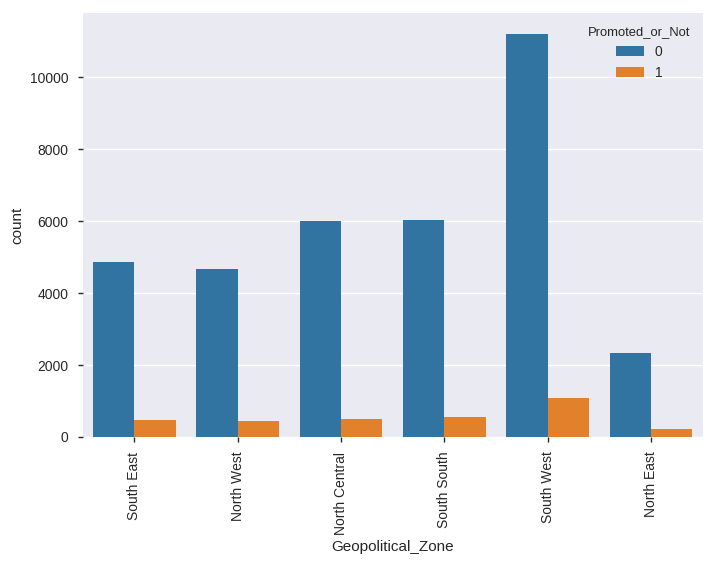

In [ ]:
sns.countplot(x = train['Geopolitical_Zone'], hue = train['Promoted_or_Not'])
plt.xticks(rotation=90)

In [ ]:
train['Qualification'].value_counts()

First Degree or HND         27257
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [ ]:
def qualification(df):
  """
  Educational qualification of the employees
  """
  q = {}
  ind = df['Qualification'].value_counts().index

  for i in ind:
    q[i] = None
  q['Non-University Education'] = 0
  q['First Degree or HND'] = 1
  q['MSc, MBA and PhD'] = 2

  df['Qualification'] = df['Qualification'].map(q)

  return df

In [ ]:
train = qualification(train)

In [ ]:
train['Qualification'].value_counts()

1    27257
2    10469
0      586
Name: Qualification, dtype: int64

In [ ]:
# Datatypes of each columns

train.dtypes

Division                                object
Qualification                            int64
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Last_performance_score                 float64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                 int64
Promoted_or_Not                          int64
Age                                      int64
Years_at_work                            int64
Geopolitical_Zone                       object
dtype: object

In [ ]:
train.isnull().sum()

Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Last_performance_score                 0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
Age                                    0
Years_at_work                          0
Geopolitical_Zone                      0
dtype: int64

In [ ]:
train['Geopolitical_Zone'].unique()

array(['South East', 'North West', 'North Central', 'South South',
       'South West', 'North East'], dtype=object)

In [ ]:
encoded = encoder(train)

In [ ]:
encoded.head()

,Qualification,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,No_of_previous_employers,Promoted_or_Not,Age,Years_at_work,Division_1,Division_2,Division_3,Division_4,Division_5,Division_6,Division_7,Division_8,Gender_1,Channel_of_Recruitment_1,Channel_of_Recruitment_2,State_Of_Origin_1,State_Of_Origin_2,State_Of_Origin_3,State_Of_Origin_4,State_Of_Origin_5,State_Of_Origin_6,State_Of_Origin_7,State_Of_Origin_8,State_Of_Origin_9,State_Of_Origin_10,State_Of_Origin_11,State_Of_Origin_12,State_Of_Origin_13,State_Of_Origin_14,State_Of_Origin_15,State_Of_Origin_16,State_Of_Origin_17,State_Of_Origin_18,State_Of_Origin_19,State_Of_Origin_20,State_Of_Origin_21,State_Of_Origin_22,State_Of_Origin_23,State_Of_Origin_24,State_Of_Origin_25,State_Of_Origin_26,State_Of_Origin_27,State_Of_Origin_28,State_Of_Origin_29,State_Of_Origin_30,State_Of_Origin_31,State_Of_Origin_32,State_Of_Origin_33,State_Of_Origin_34,State_Of_Origin_35,State_Of_Origin_36,Foreign_schooled_1,Marital_Status_1,Marital_Status_2,Past_Disciplinary_Action_1,Previous_IntraDepartmental_Movement_1,Geopolitical_Zone_1,Geopolitical_Zone_2,Geopolitical_Zone_3,Geopolitical_Zone_4,Geopolitical_Zone_5
0,2,2,12.5,1,0,41,0,0,33,8,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,2,12.5,0,0,52,0,0,28,4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,2,7.5,0,0,42,0,0,32,7,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,3,2.5,0,0,42,1,0,37,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,3,7.5,0,0,77,1,0,29,7,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


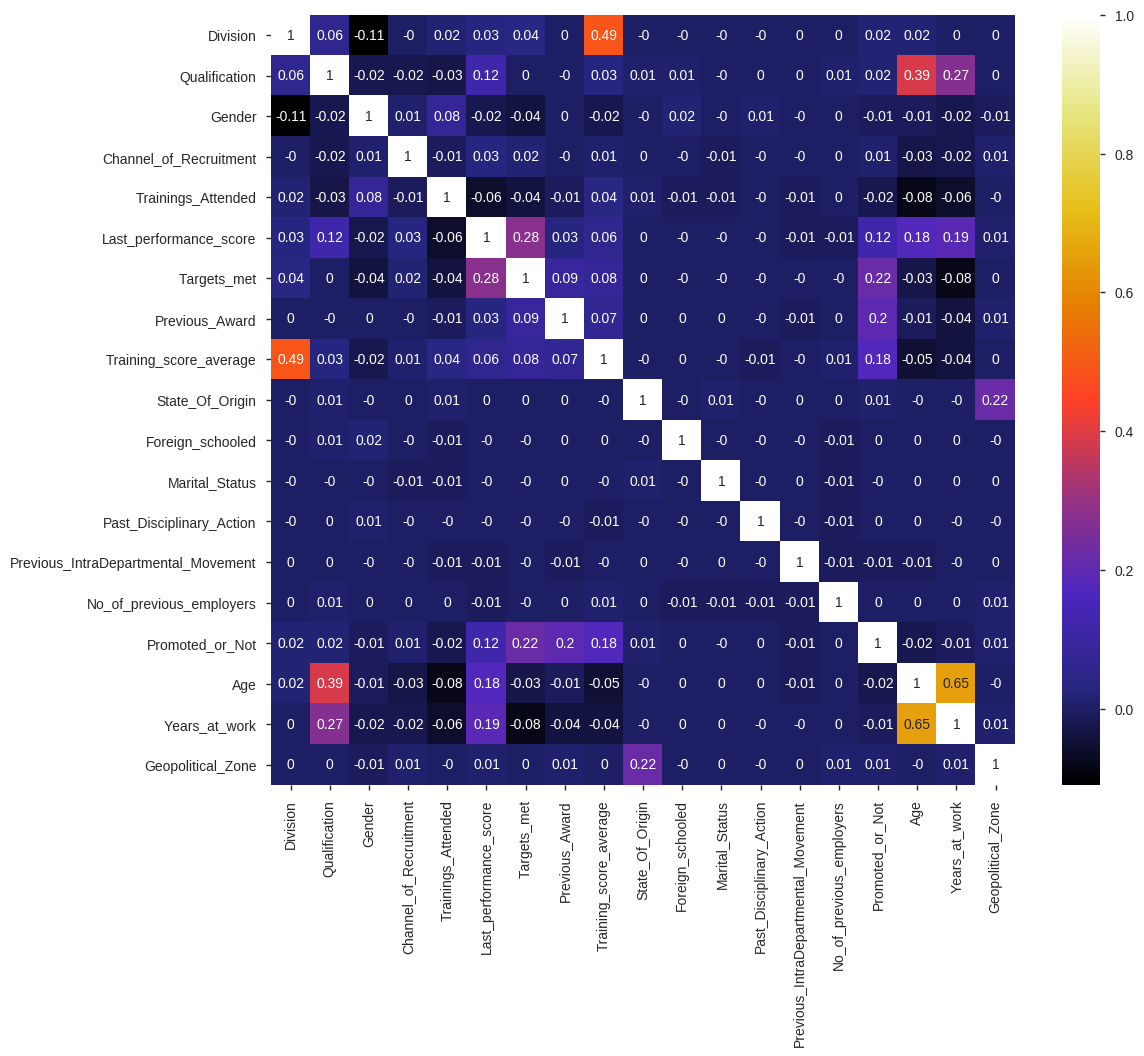

In [ ]:
# Correlation heatmap of the trainset

plt.figure(figsize=(12, 10))
sns.heatmap(train.corr().round(2), cmap=plt.cm.CMRmap, annot=True)

In [ ]:
# Splitting the encoded data into Independent and Dependent variables

X = encoded.drop('Promoted_or_Not', axis=1).values
y = encoded['Promoted_or_Not'].values

In [ ]:
# Splitting into training and validation set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def c_matrix(y_pred, true=y_test):
  print(sns.heatmap(confusion_matrix(true, y_pred), annot=True, fmt='g', cmap=plt.cm.BuGn_r), '\n')
  print('Accuracy: ', accuracy_score(true, y_pred), '\n')
  print(classification_report(true, y_pred))


## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
eval_set = [(X_test, y_test)]

In [ ]:
model = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.2, subsample=0.5, tree_method='approx', n_jobs=-1)
model.fit(X_train, y_train, eval_metric='error', eval_set=eval_set);

[0]	validation_0-error:0.076214
[1]	validation_0-error:0.075866
[2]	validation_0-error:0.074648
[3]	validation_0-error:0.074474
[4]	validation_0-error:0.074822
[5]	validation_0-error:0.074735
[6]	validation_0-error:0.074648
[7]	validation_0-error:0.074039
[8]	validation_0-error:0.072038
[9]	validation_0-error:0.068906
[10]	validation_0-error:0.070733
[11]	validation_0-error:0.069254
[12]	validation_0-error:0.068906
[13]	validation_0-error:0.065251
[14]	validation_0-error:0.064729
[15]	validation_0-error:0.064816
[16]	validation_0-error:0.064816
[17]	validation_0-error:0.062902
[18]	validation_0-error:0.064294
[19]	validation_0-error:0.062206
[20]	validation_0-error:0.062467
[21]	validation_0-error:0.062728
[22]	validation_0-error:0.062119
[23]	validation_0-error:0.061771
[24]	validation_0-error:0.062293
[25]	validation_0-error:0.062206
[26]	validation_0-error:0.061858
[27]	validation_0-error:0.061858
[28]	validation_0-error:0.061945
[29]	validation_0-error:0.061423
[30]	validation_0-er

AxesSubplot(0.125,0.11;0.62x0.77) 

0.9414477118496607 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10495
           1       0.89      0.37      0.53       999

    accuracy                           0.94     11494
   macro avg       0.91      0.68      0.75     11494
weighted avg       0.94      0.94      0.93     11494



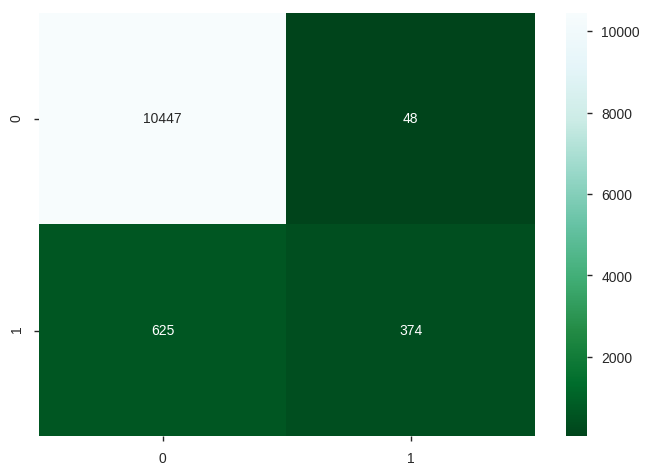

In [ ]:
pred1 = model.predict(X_test)
c_matrix(pred1)

In [ ]:
pred1.shape

(11494,)

AxesSubplot(0.125,0.11;0.62x0.77) 

0.9414477118496607 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10495
           1       0.89      0.37      0.53       999

    accuracy                           0.94     11494
   macro avg       0.91      0.68      0.75     11494
weighted avg       0.94      0.94      0.93     11494



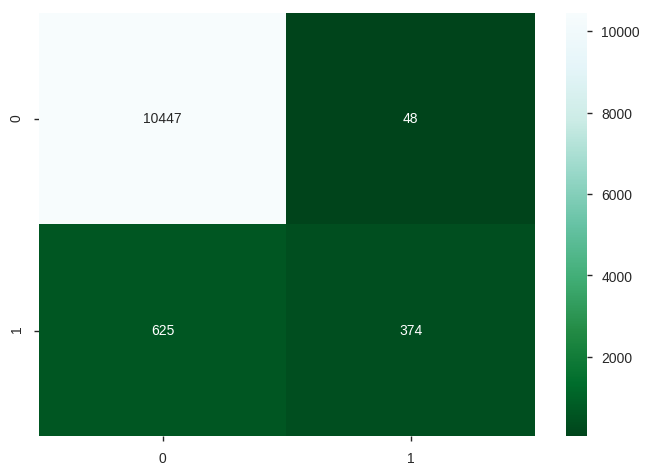

In [ ]:
pred = model.predict(X_test)
c_matrix(pred)

## Catboost

In [ ]:
!pip install catboost==0.17

     |████████████████████████████████| 62.2MB 2.4MB/s 


In [ ]:
from catboost import CatBoostClassifier
from catboost.utils import eval_metric

In [ ]:
#importing library and building model
# 3rd best model and parameters 
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=500, depth=12, learning_rate=0.19, eval_metric='F1', score_function='L2', early_stopping_rounds=20, use_best_model=True)

model.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4414966	test: 0.4456114	best: 0.4456114 (0)	total: 1.5s	remaining: 12m 30s
1:	learn: 0.4699160	test: 0.4893147	best: 0.4893147 (1)	total: 2.7s	remaining: 11m 12s
2:	learn: 0.4888593	test: 0.5189504	best: 0.5189504 (2)	total: 3.93s	remaining: 10m 51s
3:	learn: 0.4835384	test: 0.5134938	best: 0.5189504 (2)	total: 5.22s	remaining: 10m 47s
4:	learn: 0.4850697	test: 0.5155684	best: 0.5189504 (2)	total: 6.46s	remaining: 10m 39s
5:	learn: 0.4903654	test: 0.5160350	best: 0.5189504 (2)	total: 7.63s	remaining: 10m 28s
6:	learn: 0.4925324	test: 0.5253991	best: 0.5253991 (6)	total: 8.76s	remaining: 10m 16s
7:	learn: 0.4935237	test: 0.5177665	best: 0.5253991 (6)	total: 9.96s	remaining: 10m 12s
8:	learn: 0.4976806	test: 0.5170167	best: 0.5253991 (6)	total: 11.2s	remaining: 10m 12s
9:	learn: 0.4973440	test: 0.5158960	best: 0.5253991 (6)	total: 12.4s	remaining: 10m 8s
10:	learn: 0.5004965	test: 0.5176640	best: 0.5253991 (6)	total: 13.6s	remaining: 10m 2s
11:	learn: 0.5044569	test: 0.521551

In [ ]:
from catboost.utils import eval_metric

pred = model.predict(X_test)
eval_metric(y_test, pred, 'F1')

[0.5286532951289399]

AxesSubplot(0.125,0.11;0.62x0.77) 

0.9427527405602923 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10495
           1       0.93      0.37      0.53       999

    accuracy                           0.94     11494
   macro avg       0.94      0.68      0.75     11494
weighted avg       0.94      0.94      0.93     11494



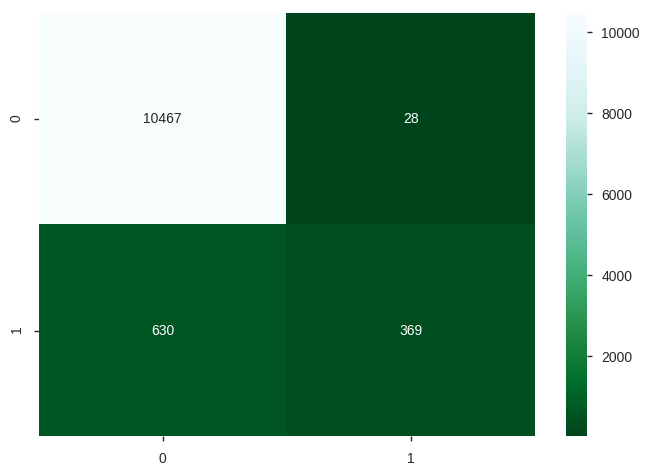

In [ ]:
c_matrix(pred)

In [ ]:
# 3rd best
# model = CatBoostClassifier(iterations=500, depth=12, learning_rate=0.2, early_stopping_rounds=20, score_function='L2', bootstrap_type= 'Bernoulli', subsample=0.8, sampling_frequency='PerTree', random_strength=0.3, use_best_model=True, leaf_estimation_iterations=2, fold_len_multiplier=1.8, best_model_min_trees=3)
# best
# model = CatBoostClassifier(iterations=500, depth=12, learning_rate=0.2, eval_metric='F1', early_stopping_rounds=20, score_function='L2', bootstrap_type= 'Bernoulli', subsample=0.8, sampling_frequency='PerTree', random_strength=0.3, use_best_model=True, leaf_estimation_iterations=2, fold_len_multiplier=1.8, best_model_min_trees=8)

# 2nd best
# model = CatBoostClassifier(iterations=500, 
#                            depth=12, 
#                            learning_rate=0.2, 
#                            eval_metric='F1', 
#                            bootstrap_type= 'Bernoulli', 
#                            subsample=0.8, 
#                            sampling_frequency='PerTree', 
#                            early_stopping_rounds=50, 
#                            score_function='L2', 
#                            l2_leaf_reg=12,
#                            random_strength=0.3, 
#                            use_best_model=True, 
#                            leaf_estimation_iterations=2, 
#                            fold_len_multiplier=1.8, 
#                            best_model_min_trees=8)

model = CatBoostClassifier(iterations=600, 
                           depth=12, 
                           learning_rate=0.2, 
                           eval_metric='F1', 
                           bootstrap_type= 'Bernoulli', 
                           subsample=0.8, 
                           sampling_frequency='PerTree', 
                           early_stopping_rounds=20, 
                           score_function='L2', 
                           random_strength=0.3, 
                           use_best_model=True, 
                           leaf_estimation_iterations=2, 
                           fold_len_multiplier=1.8, 
                           best_model_min_trees=2)

model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4394710	test: 0.4407796	best: 0.4407796 (0)	total: 914ms	remaining: 9m 7s
1:	learn: 0.4328409	test: 0.4501511	best: 0.4501511 (1)	total: 1.58s	remaining: 7m 51s
2:	learn: 0.4487004	test: 0.4643125	best: 0.4643125 (2)	total: 2.27s	remaining: 7m 32s
3:	learn: 0.4638269	test: 0.4915379	best: 0.4915379 (3)	total: 2.95s	remaining: 7m 20s
4:	learn: 0.4770519	test: 0.5098039	best: 0.5098039 (4)	total: 3.6s	remaining: 7m 8s
5:	learn: 0.4814691	test: 0.5151954	best: 0.5151954 (5)	total: 4.29s	remaining: 7m 4s
6:	learn: 0.4717362	test: 0.5054785	best: 0.5151954 (5)	total: 4.32s	remaining: 6m 5s
7:	learn: 0.4771812	test: 0.5040175	best: 0.5151954 (5)	total: 5.03s	remaining: 6m 12s
8:	learn: 0.4759664	test: 0.5021962	best: 0.5151954 (5)	total: 5.61s	remaining: 6m 8s
9:	learn: 0.4744624	test: 0.4977974	best: 0.5151954 (5)	total: 6.3s	remaining: 6m 11s
10:	learn: 0.4834504	test: 0.5043860	best: 0.5151954 (5)	total: 6.91s	remaining: 6m 10s
11:	learn: 0.4848080	test: 0.5065693	best: 0.5151

In [ ]:
pred2 = model.predict(X_test)
eval_metric(y_test, pred2, 'F1')

[0.5313390313390314]

In [ ]:
pred2 = pred2.astype('int')

AxesSubplot(0.125,0.11;0.62x0.77) 

0.9427527405602923 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10495
           1       0.92      0.37      0.53       999

    accuracy                           0.94     11494
   macro avg       0.93      0.69      0.75     11494
weighted avg       0.94      0.94      0.93     11494



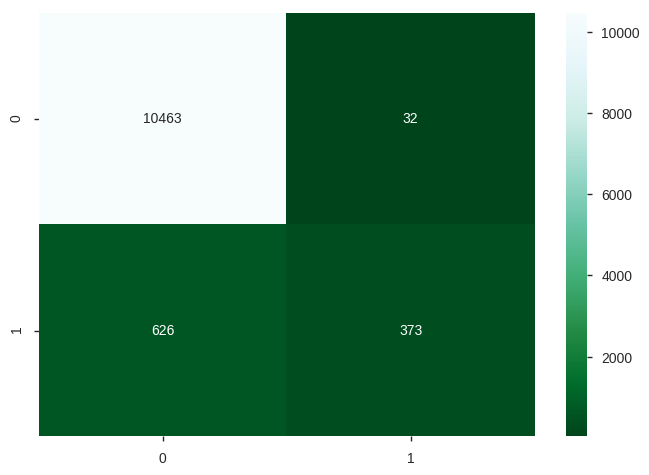

In [ ]:
c_matrix(pred2)

## Submission

In [ ]:
test_data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DSN Pre-Bootcamp/test.csv')

In [ ]:
# cleaning the test set
test = clean_dataset(test_data)

In [ ]:
test = feature_engineer(test)

In [ ]:
test.duplicated().sum()

3

In [ ]:
test = geo_zone(test)

In [ ]:
test = qualification(test)

In [ ]:
cleaned_test = encoder(test)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_test = scaler.fit_transform(cleaned_test)

In [ ]:
test_pred = model.predict(scaled_test)

In [ ]:
df = pd.DataFrame()
df['EmployeeNo'] = test_data['EmployeeNo']
df['Promoted_or_Not'] = test_pred.astype('int')
df.Promoted_or_Not.value_counts()

0    15969
1      527
Name: Promoted_or_Not, dtype: int64

In [ ]:
df.to_csv('new_sub49.csv', index=0)